In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [20]:
X = np.array([5, 45, 190, 200, 40, 70, 54, 150, 120, 110])
X

array([  5,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [4]:
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

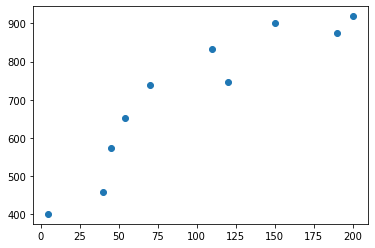

In [10]:
plt.scatter(X, y)
plt.show()

In [13]:
# c использованием intercept

In [6]:
b1 = (np.mean(X*y) - np.mean(X)*np.mean(y))/(np.mean(X**2)-(np.mean(X)**2))
b1

2.5376040502863573

In [11]:
b0 = np.mean(y) - b1*np.mean(X)
b0

460.1997614518224

In [12]:
# c использованием intercept
y_hat = b0 + b1*X
y_hat

array([472.8877817 , 574.39194371, 942.34453101, 967.72057151,
       561.70392346, 637.83204497, 597.23038017, 840.84036899,
       764.71224749, 739.33620698])

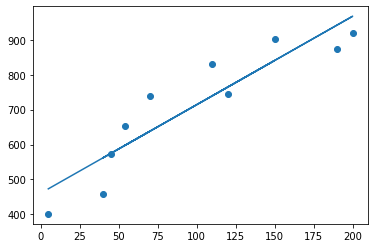

In [14]:
plt.scatter(X, y)
plt.plot(X, y_hat)
plt.show()

In [15]:
# без использования intercept

In [22]:
X = X.reshape((10,1))
X

array([[  5],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [24]:
y = y.reshape((10, 1))
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [28]:
B = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T@y)
B

array([[5.85348476]])

In [30]:
y_hat = B[0,0]*X
y_hat

array([[  29.26742381],
       [ 263.40681429],
       [1112.16210477],
       [1170.69695239],
       [ 234.13939048],
       [ 409.74393334],
       [ 316.08817715],
       [ 878.02271429],
       [ 702.41817143],
       [ 643.88332381]])

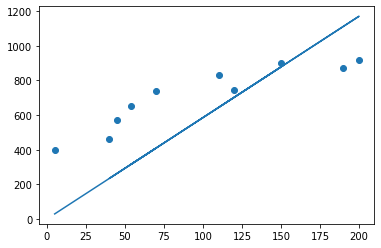

In [31]:
plt.scatter(X, y)
plt.plot(X, y_hat)
plt.show()

2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [32]:
X = np.array([5, 45, 190, 200, 40, 70, 54, 150, 120, 110])
X

array([  5,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [33]:
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [54]:
def mse_(B1, y=y, X=X, n=10):
    return np.sum(B1*X-y)**2/n

In [35]:
alpha = 1e-6
alpha

1e-06

In [45]:
B1 = 0.1

In [46]:
n = 10

In [47]:
for i in range(1000):
    B1 -= alpha*(2/n)*np.sum((B1*X-y)*X)
    if i%50==0:
        print('Iteration: {i}, B1={B1}, mse={mse}'.format(i=i, B1=B1, mse=mse_(B1)))

Iteration: 0, B1=0.25714608, mse=4686728.137968535
Iteration: 50, B1=4.452107385224734, mse=738821.0761815666
Iteration: 100, B1=5.502566301932178, mse=283745.5213366958
Iteration: 150, B1=5.765611382780918, mse=203244.48456829152
Iteration: 200, B1=5.831480417217407, mse=185183.99706985545
Iteration: 250, B1=5.847974661031418, mse=180793.01569393763
Iteration: 300, B1=5.852104979341433, mse=179701.71964031586
Iteration: 350, B1=5.853139251026416, mse=179428.96574767213
Iteration: 400, B1=5.853398242667755, mse=179360.69796397554
Iteration: 450, B1=5.853463096681702, mse=179343.60508372576
Iteration: 500, B1=5.853479336754562, mse=179339.32498857396
Iteration: 550, B1=5.853483403426002, mse=179338.25321931482
Iteration: 600, B1=5.853484421759895, mse=179337.98483841898
Iteration: 650, B1=5.853484676760561, mse=179337.91763327582
Iteration: 700, B1=5.853484740615194, mse=179337.90080446008
Iteration: 750, B1=5.853484756605012, mse=179337.89659036172
Iteration: 800, B1=5.853484760609019,

3. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

В случае когда известна сигма (среднее квадратичное отклонение) для генеральной совокупности используется критерий Z, а соответственно и таблица значений функции Лапласа. В случае когда сигма генеральной совокупности не известна используется критерий t и таблица критических точек распределения Стьюдента.